In [128]:
import pandas as pd
import numpy as np
from numpy.random import randint, choice
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(14, 8))

In [506]:
def f(x):
    return x**3

In [507]:
x = np.linspace(-50, 50, 1000)
data = pd.DataFrame({'y': f(x), 'x': x})

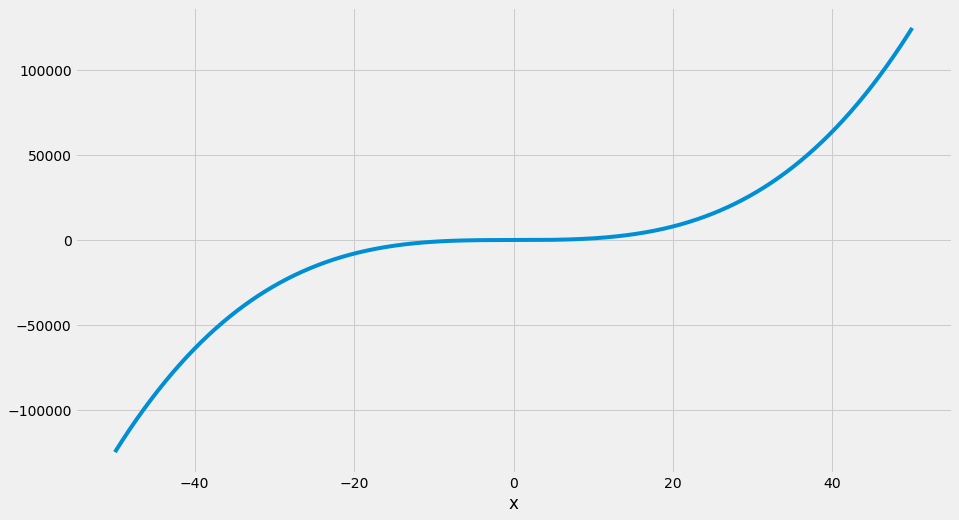

In [508]:
data.plot(x='x', y='y', legend=False);

In [398]:
from numpy.random import normal

In [545]:
x={}
datasets = ['Train', 'Test']
x['Train'] = np.linspace(-1, 1, 500)
x['Test'] = np.linspace(1, 2, 250)
degree = {'Underfit': 1, 'Right Fit': 3, 'Overfit': 5}

sample, noise = 20, .2
models, result = {}, pd.DataFrame()
for i in range(100):
    x_ = {d: choice(x[d], size=sample, replace=False) for d in datasets}
    y_ = {d: f(x_[d]) for d in datasets}
    y_['Train'] += normal(loc=0,
                          scale=np.std(y_['Train']) * noise,
                          size=sample)

    models = {fit: np.poly1d(np.polyfit(x=x_['Train'],
                                        y=y_['Train'],
                                        deg=deg))
              for fit, deg in degree.items()}

    for fit, model in models.items():
        for dataset in datasets:
            pred = model(x_[dataset])
            result = result.append(pd.DataFrame(dict(x=x_[dataset],
                                                     Model=fit,
                                                     Data=dataset,
                                                     y=pred,
                                                     Error=pred - y_[dataset])))

In [546]:
y = {d: f(x[d]) for d in datasets}
y['Train_noise'] = y['Train'] + normal(loc=0,
                                       scale=np.std(y['Train']) * noise,
                                       size=len(y['Train']))
colors = {'Underfit': 'darkblue', 'Right Fit': 'darkgreen', 'Overfit': 'darkred'}
test_data = result[result.Data == 'Test']

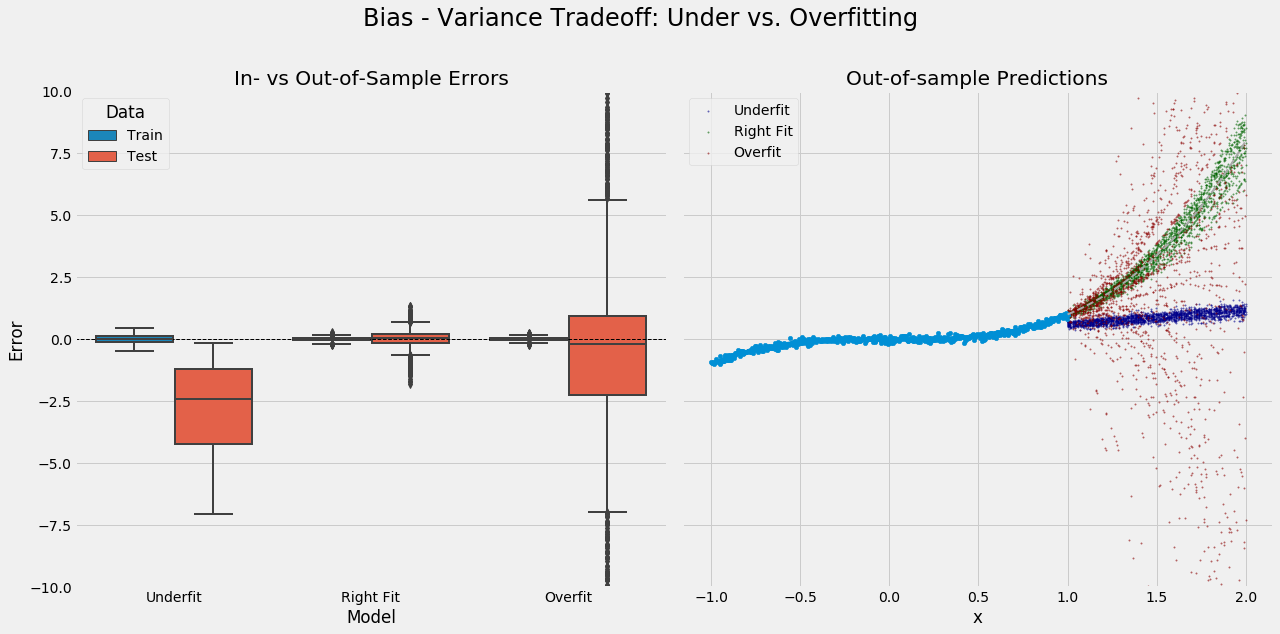

In [552]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 9), sharey=True)
sns.boxplot(x='Model', y='Error', hue='Data',
            data=result, ax=axes[0], linewidth=2)
axes[0].set_title('In- vs Out-of-Sample Errors')
axes[0].axhline(0, ls='--', lw=1, color='k')
axes[0].set_ylim(-10, 10)

for model in colors.keys():
    (test_data[(test_data['Model'] == model)]
     .plot.scatter(x='x',
                   y='y',
                   ax=axes[1],
                   s=2,
                   color=colors[model],
                   alpha=.5,
                   label=model))

pd.Series(y['Train'], index=x['Train']).sort_index().plot(
    ax=axes[1], title='Out-of-sample Predictions')
pd.DataFrame(dict(x=x['Train'], y=y['Train_noise'])
             ).plot.scatter(x='x', y='y', ax=axes[1])
pd.Series(y['Test'], index=x['Test']).plot(
    color='darkgrey', lw=2, ls='--', ax=axes[1])
axes[1].set_ylim(-10, 10)

fig.tight_layout()
fig.suptitle('Bias - Variance Tradeoff: Under vs. Overfitting', fontsize=24)
fig.savefig('bias_variance', dpi=600)
fig.subplots_adjust(top=0.85)